## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
from keras.layers import BatchNormalization

def build_mlp(input_shape, batches, bn_after_input, bn_before_act, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    # add BatchNormalization after input layer if bn_after_input is True
    if bn_after_input:
        x = BatchNormalization()(input_layer)
    else:
        x = input_layer
        
    for i, n_units in enumerate(num_neurons):
        if i == 0:  # first Hidden layer
            # add BatchNormalization before activation if bn_before_act is True
            # if BN is added right after input layer, BN is not necessary before activation of first hidden layer
            if bn_after_input:
                pass
            elif bn_before_act:
                x = BatchNormalization()(x)
            
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(x)
            
            # add BatchNormalization before activation if bn_before_act is False
            if not bn_before_act:
                x = BatchNormalization()(x)
        else:
            # add BatchNormalization before activation if bn_before_act is True
            if bn_before_act:
                x = BatchNormalization()(x)
            
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(x)
            
            # add BatchNormalization before activation if bn_before_act is False
            if not bn_before_act:
                x = BatchNormalization()(x)
        
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
將結果繪出
"""
def plot_result(name_tag, result_dict):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(12,10))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
    plt.title(name_tag + " - Loss")
    plt.ylim([0, 5])
    plt.legend(loc = 'upper right')
    plt.show()
    
    plt.figure(figsize=(12,10))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
    plt.title(name_tag + " - Accuracy")
    plt.legend(loc = 'upper left')
    plt.show()

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [16, 32, 128, 256, 512]
MOMENTUM = 0.95
BN_BEFORE_ACT = [True, False]  # BN before (true) of after (false) Activation
BN_AFTER_INPUT = [True, False]  # BN added (true) or not added (false) after input layer


BN_BEFORE_ACT = True
BN_AFTER_INPUT = True
BATCH_SIZE = 16

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
________________________________________________________________

50000/50000 [==============================] - 76s 2ms/step - loss: 0.5911 - accuracy: 0.7904 - val_loss: 1.5495 - val_accuracy: 0.5436
Epoch 47/50
50000/50000 [==============================] - 75s 1ms/step - loss: 0.5785 - accuracy: 0.7938 - val_loss: 1.5628 - val_accuracy: 0.5515
Epoch 48/50
50000/50000 [==============================] - 75s 2ms/step - loss: 0.5760 - accuracy: 0.7961 - val_loss: 1.5521 - val_accuracy: 0.5482
Epoch 49/50
50000/50000 [==============================] - 75s 1ms/step - loss: 0.5704 - accuracy: 0.7965 - val_loss: 1.5581 - val_accuracy: 0.5511
Epoch 50/50
10000/10000 [==============================] - 2s 152us/step
Test loss: 1.6113036750793457
Test accuracy: 0.5507000088691711

BN_BEFORE_ACT = True
BN_AFTER_INPUT = True
BATCH_SIZE = 32

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______

50000/50000 [==============================] - 44s 873us/step - loss: 0.3463 - accuracy: 0.8767 - val_loss: 1.9512 - val_accuracy: 0.5370
Epoch 40/50
50000/50000 [==============================] - 44s 875us/step - loss: 0.3415 - accuracy: 0.8785 - val_loss: 1.9354 - val_accuracy: 0.5335
Epoch 41/50
50000/50000 [==============================] - 44s 874us/step - loss: 0.3290 - accuracy: 0.8838 - val_loss: 1.9468 - val_accuracy: 0.5425
Epoch 42/50
50000/50000 [==============================] - 43s 867us/step - loss: 0.3156 - accuracy: 0.8880 - val_loss: 1.9655 - val_accuracy: 0.5399
Epoch 43/50
50000/50000 [==============================] - 44s 877us/step - loss: 0.3198 - accuracy: 0.8861 - val_loss: 1.9620 - val_accuracy: 0.5441
Epoch 44/50
50000/50000 [==============================] - 44s 873us/step - loss: 0.3087 - accuracy: 0.8901 - val_loss: 2.0120 - val_accuracy: 0.5352
Epoch 45/50
50000/50000 [==============================] - 44s 873us/step - loss: 0.2984 - accuracy: 0.8943 - va

50000/50000 [==============================] - 19s 382us/step - loss: 0.1417 - accuracy: 0.9569 - val_loss: 2.2440 - val_accuracy: 0.5203
Epoch 33/50
50000/50000 [==============================] - 19s 376us/step - loss: 0.1330 - accuracy: 0.9603 - val_loss: 2.2853 - val_accuracy: 0.5167
Epoch 34/50
50000/50000 [==============================] - 19s 376us/step - loss: 0.1236 - accuracy: 0.9635 - val_loss: 2.2965 - val_accuracy: 0.5219
Epoch 35/50
50000/50000 [==============================] - 19s 375us/step - loss: 0.1204 - accuracy: 0.9635 - val_loss: 2.3721 - val_accuracy: 0.5161
Epoch 36/50
50000/50000 [==============================] - 19s 377us/step - loss: 0.1203 - accuracy: 0.9636 - val_loss: 2.3338 - val_accuracy: 0.5172
Epoch 37/50
50000/50000 [==============================] - 19s 379us/step - loss: 0.1054 - accuracy: 0.9688 - val_loss: 2.4168 - val_accuracy: 0.5252
Epoch 38/50
50000/50000 [==============================] - 19s 376us/step - loss: 0.1018 - accuracy: 0.9699 - va

Epoch 26/50
50000/50000 [==============================] - 14s 285us/step - loss: 0.2670 - accuracy: 0.9291 - val_loss: 1.8158 - val_accuracy: 0.5162
Epoch 27/50
50000/50000 [==============================] - 14s 283us/step - loss: 0.2451 - accuracy: 0.9360 - val_loss: 1.8768 - val_accuracy: 0.5095
Epoch 28/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.2225 - accuracy: 0.9440 - val_loss: 1.9068 - val_accuracy: 0.5129
Epoch 29/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.2022 - accuracy: 0.9507 - val_loss: 1.9497 - val_accuracy: 0.5083
Epoch 30/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.1841 - accuracy: 0.9549 - val_loss: 1.9790 - val_accuracy: 0.5092
Epoch 31/50
50000/50000 [==============================] - 14s 285us/step - loss: 0.1661 - accuracy: 0.9624 - val_loss: 2.0306 - val_accuracy: 0.5056
Epoch 32/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.1489 - accuracy:

50000/50000 [==============================] - 12s 244us/step - loss: 0.7701 - accuracy: 0.7527 - val_loss: 1.4263 - val_accuracy: 0.5148
Epoch 20/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.7348 - accuracy: 0.7652 - val_loss: 1.4405 - val_accuracy: 0.5141
Epoch 21/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.7004 - accuracy: 0.7800 - val_loss: 1.4530 - val_accuracy: 0.5158
Epoch 22/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.6670 - accuracy: 0.7935 - val_loss: 1.4654 - val_accuracy: 0.5108
Epoch 23/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.6332 - accuracy: 0.8043 - val_loss: 1.4845 - val_accuracy: 0.5088
Epoch 24/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.6013 - accuracy: 0.8202 - val_loss: 1.5008 - val_accuracy: 0.5079
Epoch 25/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.5681 - accuracy: 0.8314 - va

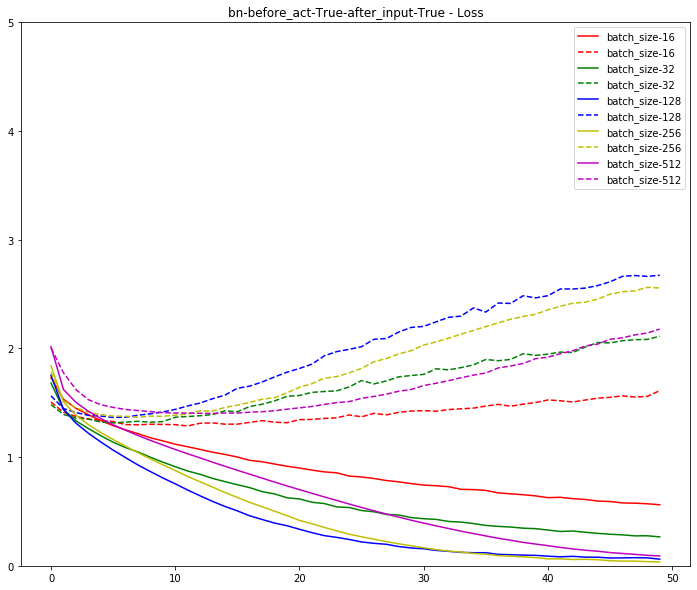

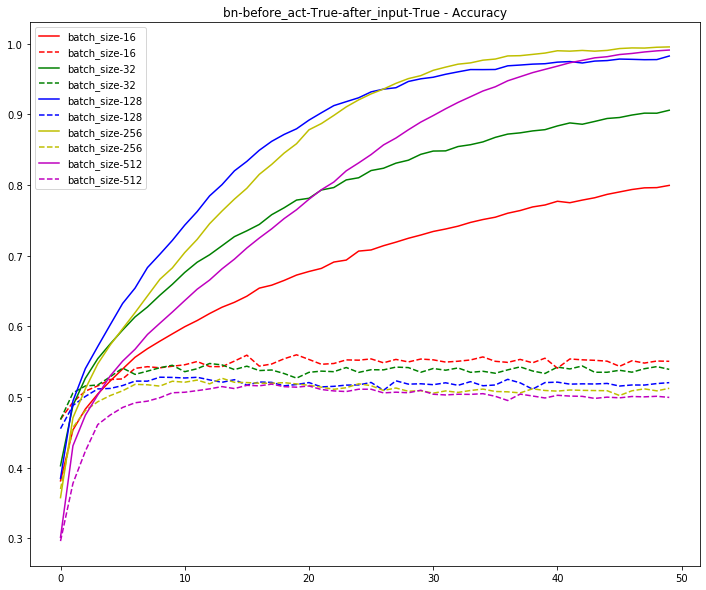


BN_BEFORE_ACT = True
BN_AFTER_INPUT = False
BATCH_SIZE = 16

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_______________________________________________________________

50000/50000 [==============================] - 75s 1ms/step - loss: 0.5999 - accuracy: 0.7862 - val_loss: 1.5482 - val_accuracy: 0.5457
Epoch 47/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.5882 - accuracy: 0.7912 - val_loss: 1.5526 - val_accuracy: 0.5521
Epoch 48/50
50000/50000 [==============================] - 75s 1ms/step - loss: 0.5687 - accuracy: 0.7971 - val_loss: 1.5630 - val_accuracy: 0.5511
Epoch 49/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.5701 - accuracy: 0.7974 - val_loss: 1.5493 - val_accuracy: 0.5459
Epoch 50/50
10000/10000 [==============================] - 2s 158us/step
Test loss: 1.5691992416381837
Test accuracy: 0.5526999831199646

BN_BEFORE_ACT = True
BN_AFTER_INPUT = False
BATCH_SIZE = 32

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______

50000/50000 [==============================] - 45s 905us/step - loss: 0.3412 - accuracy: 0.8802 - val_loss: 1.9936 - val_accuracy: 0.5322
Epoch 40/50
50000/50000 [==============================] - 44s 887us/step - loss: 0.3374 - accuracy: 0.8801 - val_loss: 1.9702 - val_accuracy: 0.5352
Epoch 41/50
50000/50000 [==============================] - 44s 889us/step - loss: 0.3231 - accuracy: 0.8850 - val_loss: 2.0271 - val_accuracy: 0.5359
Epoch 42/50
50000/50000 [==============================] - 45s 893us/step - loss: 0.3165 - accuracy: 0.8871 - val_loss: 2.0480 - val_accuracy: 0.5335
Epoch 43/50
50000/50000 [==============================] - 45s 890us/step - loss: 0.3148 - accuracy: 0.8879 - val_loss: 2.0570 - val_accuracy: 0.5278
Epoch 44/50
50000/50000 [==============================] - 45s 890us/step - loss: 0.3090 - accuracy: 0.8897 - val_loss: 2.0654 - val_accuracy: 0.5369
Epoch 45/50
50000/50000 [==============================] - 45s 899us/step - loss: 0.3034 - accuracy: 0.8917 - va

Epoch 33/50
50000/50000 [==============================] - 20s 394us/step - loss: 0.1369 - accuracy: 0.9584 - val_loss: 2.2439 - val_accuracy: 0.5109
Epoch 34/50
50000/50000 [==============================] - 20s 398us/step - loss: 0.1300 - accuracy: 0.9609 - val_loss: 2.2729 - val_accuracy: 0.5196
Epoch 35/50
50000/50000 [==============================] - 20s 400us/step - loss: 0.1154 - accuracy: 0.9658 - val_loss: 2.3538 - val_accuracy: 0.5144
Epoch 36/50
50000/50000 [==============================] - 20s 397us/step - loss: 0.1088 - accuracy: 0.9675 - val_loss: 2.3637 - val_accuracy: 0.5213
Epoch 37/50
50000/50000 [==============================] - 20s 400us/step - loss: 0.0977 - accuracy: 0.9721 - val_loss: 2.3987 - val_accuracy: 0.5160
Epoch 38/50
50000/50000 [==============================] - 20s 401us/step - loss: 0.0965 - accuracy: 0.9719 - val_loss: 2.4143 - val_accuracy: 0.5166
Epoch 39/50
50000/50000 [==============================] - 20s 399us/step - loss: 0.0847 - accuracy:

50000/50000 [==============================] - 14s 286us/step - loss: 0.2618 - accuracy: 0.9313 - val_loss: 1.8715 - val_accuracy: 0.5043
Epoch 27/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.2382 - accuracy: 0.9384 - val_loss: 1.9359 - val_accuracy: 0.5030
Epoch 28/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.2150 - accuracy: 0.9458 - val_loss: 1.9607 - val_accuracy: 0.5038
Epoch 29/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.1942 - accuracy: 0.9537 - val_loss: 2.0089 - val_accuracy: 0.5067
Epoch 30/50
50000/50000 [==============================] - 14s 290us/step - loss: 0.1751 - accuracy: 0.9600 - val_loss: 2.0366 - val_accuracy: 0.5051
Epoch 31/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.1621 - accuracy: 0.9630 - val_loss: 2.0798 - val_accuracy: 0.5072
Epoch 32/50
50000/50000 [==============================] - 14s 285us/step - loss: 0.1470 - accuracy: 0.9668 - va

Epoch 20/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.7550 - accuracy: 0.7571 - val_loss: 1.4279 - val_accuracy: 0.5147
Epoch 21/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.7214 - accuracy: 0.7717 - val_loss: 1.4426 - val_accuracy: 0.5124
Epoch 22/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6887 - accuracy: 0.7827 - val_loss: 1.4601 - val_accuracy: 0.5103
Epoch 23/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6555 - accuracy: 0.7958 - val_loss: 1.4685 - val_accuracy: 0.5115
Epoch 24/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.6215 - accuracy: 0.8114 - val_loss: 1.4842 - val_accuracy: 0.5088
Epoch 25/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.5903 - accuracy: 0.8233 - val_loss: 1.4994 - val_accuracy: 0.5101
Epoch 26/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.5587 - accuracy:

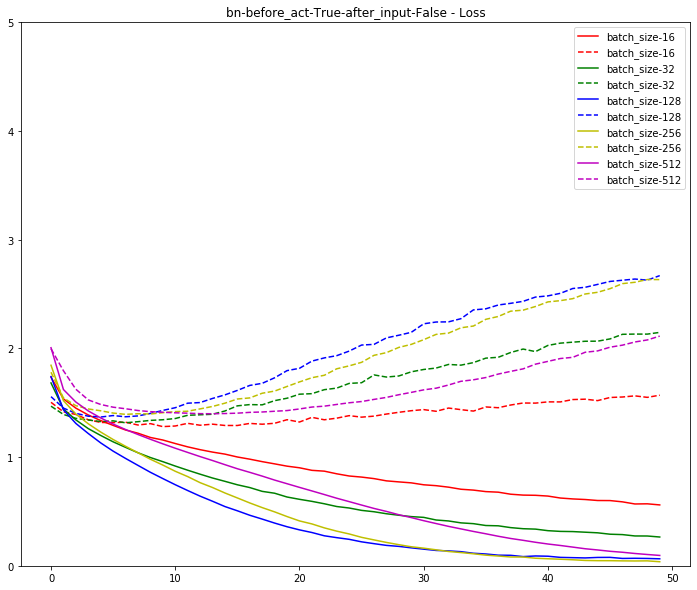

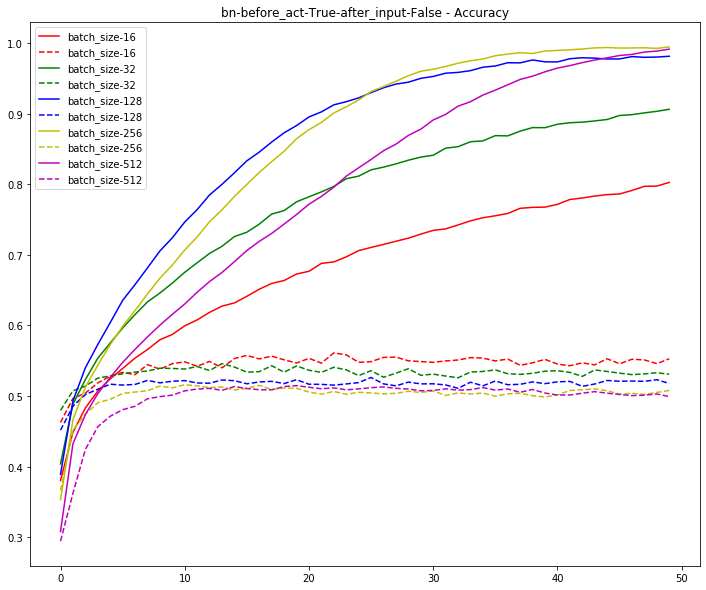


BN_BEFORE_ACT = False
BN_AFTER_INPUT = True
BATCH_SIZE = 16

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_______________________________________________________________

50000/50000 [==============================] - 77s 2ms/step - loss: 0.6611 - accuracy: 0.7665 - val_loss: 1.4408 - val_accuracy: 0.5520
Epoch 46/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.6468 - accuracy: 0.7724 - val_loss: 1.4553 - val_accuracy: 0.5544
Epoch 47/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.6370 - accuracy: 0.7777 - val_loss: 1.4659 - val_accuracy: 0.5532
Epoch 48/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.6393 - accuracy: 0.7750 - val_loss: 1.4522 - val_accuracy: 0.5518
Epoch 49/50
50000/50000 [==============================] - 78s 2ms/step - loss: 0.6192 - accuracy: 0.7793 - val_loss: 1.4665 - val_accuracy: 0.5584
Epoch 50/50
10000/10000 [==============================] - 2s 165us/step
Test loss: 1.4679472465515138
Test accuracy: 0.5541999936103821

BN_BEFORE_ACT = False
BN_AFTER_INPUT = True
BATCH_SIZE = 32

Model: "model_1"
________________________________________________________

50000/50000 [==============================] - 44s 872us/step - loss: 0.4168 - accuracy: 0.8538 - val_loss: 1.7700 - val_accuracy: 0.5447
Epoch 38/50
50000/50000 [==============================] - 43s 865us/step - loss: 0.4004 - accuracy: 0.8578 - val_loss: 1.8066 - val_accuracy: 0.5372
Epoch 39/50
50000/50000 [==============================] - 43s 869us/step - loss: 0.3902 - accuracy: 0.8598 - val_loss: 1.7584 - val_accuracy: 0.5489
Epoch 40/50
50000/50000 [==============================] - 43s 861us/step - loss: 0.3776 - accuracy: 0.8656 - val_loss: 1.7905 - val_accuracy: 0.5431
Epoch 41/50
50000/50000 [==============================] - 43s 867us/step - loss: 0.3737 - accuracy: 0.8674 - val_loss: 1.8048 - val_accuracy: 0.5507
Epoch 42/50
50000/50000 [==============================] - 43s 870us/step - loss: 0.3717 - accuracy: 0.8668 - val_loss: 1.8449 - val_accuracy: 0.5412
Epoch 43/50
50000/50000 [==============================] - 43s 868us/step - loss: 0.3524 - accuracy: 0.8733 - va

Epoch 30/50
50000/50000 [==============================] - 20s 390us/step - loss: 0.1741 - accuracy: 0.9449 - val_loss: 2.2376 - val_accuracy: 0.5038
Epoch 31/50
50000/50000 [==============================] - 19s 388us/step - loss: 0.1635 - accuracy: 0.9488 - val_loss: 2.2661 - val_accuracy: 0.5089
Epoch 32/50
50000/50000 [==============================] - 19s 389us/step - loss: 0.1552 - accuracy: 0.9517 - val_loss: 2.3044 - val_accuracy: 0.5111
Epoch 33/50
50000/50000 [==============================] - 19s 388us/step - loss: 0.1460 - accuracy: 0.9543 - val_loss: 2.3523 - val_accuracy: 0.5035
Epoch 34/50
50000/50000 [==============================] - 20s 391us/step - loss: 0.1389 - accuracy: 0.9550 - val_loss: 2.3621 - val_accuracy: 0.5112
Epoch 35/50
50000/50000 [==============================] - 19s 388us/step - loss: 0.1261 - accuracy: 0.9610 - val_loss: 2.3595 - val_accuracy: 0.5155
Epoch 36/50
50000/50000 [==============================] - 19s 389us/step - loss: 0.1205 - accuracy:

Epoch 23/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.2906 - accuracy: 0.9166 - val_loss: 1.8491 - val_accuracy: 0.5055
Epoch 24/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.2631 - accuracy: 0.9263 - val_loss: 1.8954 - val_accuracy: 0.5056
Epoch 25/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.2391 - accuracy: 0.9345 - val_loss: 1.9380 - val_accuracy: 0.5010
Epoch 26/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.2178 - accuracy: 0.9423 - val_loss: 1.9713 - val_accuracy: 0.5018
Epoch 27/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.1942 - accuracy: 0.9515 - val_loss: 1.9963 - val_accuracy: 0.5006
Epoch 28/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.1782 - accuracy: 0.9557 - val_loss: 2.0481 - val_accuracy: 0.5008
Epoch 29/50
50000/50000 [==============================] - 15s 296us/step - loss: 0.1579 - accuracy:

Epoch 16/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.7959 - accuracy: 0.7424 - val_loss: 1.4712 - val_accuracy: 0.5015
Epoch 17/50
50000/50000 [==============================] - 12s 248us/step - loss: 0.7545 - accuracy: 0.7584 - val_loss: 1.4781 - val_accuracy: 0.5065
Epoch 18/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.7147 - accuracy: 0.7751 - val_loss: 1.4998 - val_accuracy: 0.5040
Epoch 19/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.6744 - accuracy: 0.7897 - val_loss: 1.5170 - val_accuracy: 0.5038
Epoch 20/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.6339 - accuracy: 0.8041 - val_loss: 1.5277 - val_accuracy: 0.5021
Epoch 21/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.5960 - accuracy: 0.8197 - val_loss: 1.5534 - val_accuracy: 0.5010
Epoch 22/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.5573 - accuracy:

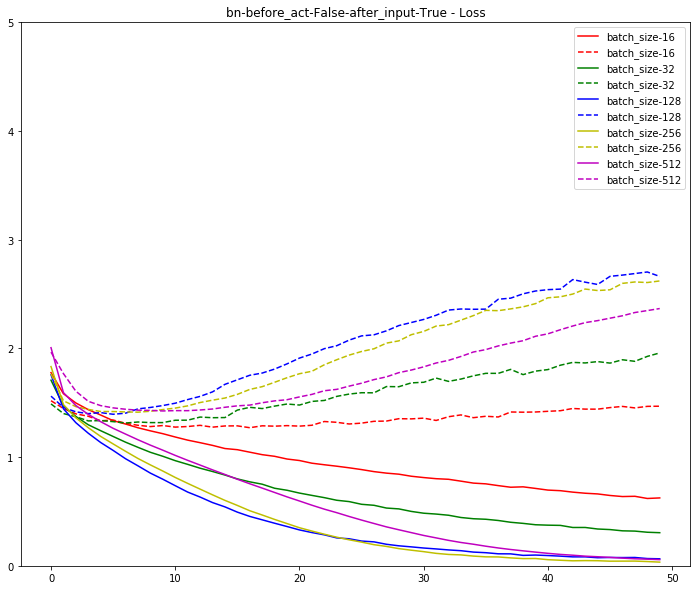

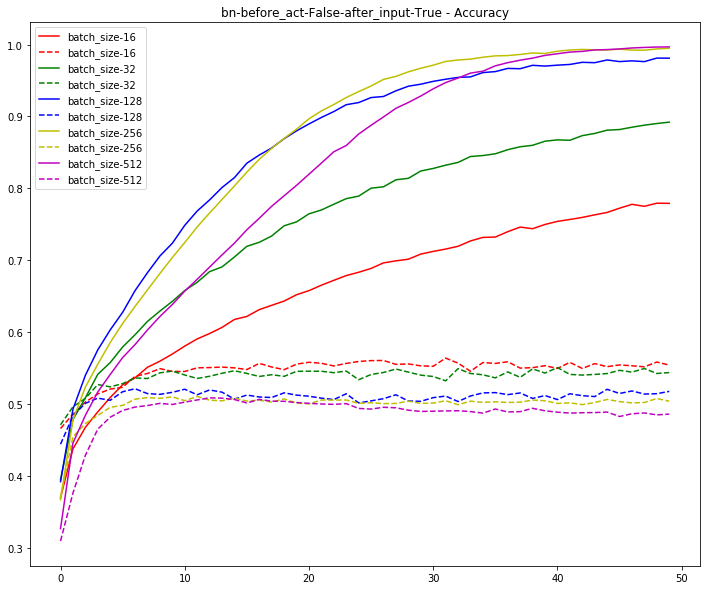


BN_BEFORE_ACT = False
BN_AFTER_INPUT = False
BATCH_SIZE = 16

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________________________

50000/50000 [==============================] - 68s 1ms/step - loss: 1.1295 - accuracy: 0.5956 - val_loss: 1.3274 - val_accuracy: 0.5303
Epoch 46/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.1230 - accuracy: 0.6030 - val_loss: 1.3554 - val_accuracy: 0.5287
Epoch 47/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.1184 - accuracy: 0.6051 - val_loss: 1.3385 - val_accuracy: 0.5345
Epoch 48/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.1158 - accuracy: 0.6039 - val_loss: 1.3875 - val_accuracy: 0.5189
Epoch 49/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.1215 - accuracy: 0.6030 - val_loss: 1.3886 - val_accuracy: 0.5148
Epoch 50/50
10000/10000 [==============================] - 1s 131us/step
Test loss: 1.3615584655761719
Test accuracy: 0.5332000255584717

BN_BEFORE_ACT = False
BN_AFTER_INPUT = False
BATCH_SIZE = 32

Model: "model_1"
_______________________________________________________

50000/50000 [==============================] - 37s 748us/step - loss: 0.9044 - accuracy: 0.6756 - val_loss: 1.5402 - val_accuracy: 0.4923
Epoch 39/50
50000/50000 [==============================] - 37s 749us/step - loss: 0.8920 - accuracy: 0.6787 - val_loss: 1.5152 - val_accuracy: 0.5083
Epoch 40/50
50000/50000 [==============================] - 37s 748us/step - loss: 0.8803 - accuracy: 0.6867 - val_loss: 1.5263 - val_accuracy: 0.5117
Epoch 41/50
50000/50000 [==============================] - 38s 751us/step - loss: 0.8672 - accuracy: 0.6890 - val_loss: 1.4986 - val_accuracy: 0.5113
Epoch 42/50
50000/50000 [==============================] - 38s 756us/step - loss: 0.8584 - accuracy: 0.6957 - val_loss: 1.5600 - val_accuracy: 0.4920
Epoch 43/50
50000/50000 [==============================] - 37s 749us/step - loss: 0.8503 - accuracy: 0.6979 - val_loss: 1.4798 - val_accuracy: 0.5240
Epoch 44/50
50000/50000 [==============================] - 37s 749us/step - loss: 0.8383 - accuracy: 0.6997 - va

Epoch 32/50
50000/50000 [==============================] - 14s 283us/step - loss: 0.5066 - accuracy: 0.8242 - val_loss: 2.3593 - val_accuracy: 0.4241
Epoch 33/50
50000/50000 [==============================] - 14s 288us/step - loss: 0.4922 - accuracy: 0.8313 - val_loss: 2.0239 - val_accuracy: 0.4729
Epoch 34/50
50000/50000 [==============================] - 14s 290us/step - loss: 0.4717 - accuracy: 0.8379 - val_loss: 2.0536 - val_accuracy: 0.4689
Epoch 35/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.4475 - accuracy: 0.8469 - val_loss: 2.0192 - val_accuracy: 0.4730
Epoch 36/50
50000/50000 [==============================] - 15s 309us/step - loss: 0.4319 - accuracy: 0.8529 - val_loss: 2.0837 - val_accuracy: 0.4640
Epoch 37/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.4182 - accuracy: 0.8578 - val_loss: 2.1215 - val_accuracy: 0.4659
Epoch 38/50
50000/50000 [==============================] - 15s 294us/step - loss: 0.4014 - accuracy:

50000/50000 [==============================] - 10s 200us/step - loss: 0.5994 - accuracy: 0.7995 - val_loss: 1.6904 - val_accuracy: 0.4886
Epoch 26/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.5743 - accuracy: 0.8104 - val_loss: 1.8504 - val_accuracy: 0.4716
Epoch 27/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.5436 - accuracy: 0.8203 - val_loss: 1.8871 - val_accuracy: 0.4545
Epoch 28/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.5176 - accuracy: 0.8317 - val_loss: 1.8506 - val_accuracy: 0.4721
Epoch 29/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.4953 - accuracy: 0.8385 - val_loss: 1.8672 - val_accuracy: 0.4685
Epoch 30/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.4682 - accuracy: 0.8487 - val_loss: 1.8587 - val_accuracy: 0.4794
Epoch 31/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.4483 - accuracy: 0.8568 - va

Epoch 19/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.9048 - accuracy: 0.6923 - val_loss: 1.5151 - val_accuracy: 0.4794
Epoch 20/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8779 - accuracy: 0.7027 - val_loss: 1.5324 - val_accuracy: 0.4881
Epoch 21/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.8500 - accuracy: 0.7141 - val_loss: 1.4903 - val_accuracy: 0.4978
Epoch 22/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.8200 - accuracy: 0.7255 - val_loss: 1.5241 - val_accuracy: 0.4840
Epoch 23/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.7928 - accuracy: 0.7364 - val_loss: 1.5648 - val_accuracy: 0.4809
Epoch 24/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.7656 - accuracy: 0.7487 - val_loss: 1.5529 - val_accuracy: 0.4842
Epoch 25/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.7389 - accuracy: 0.7557

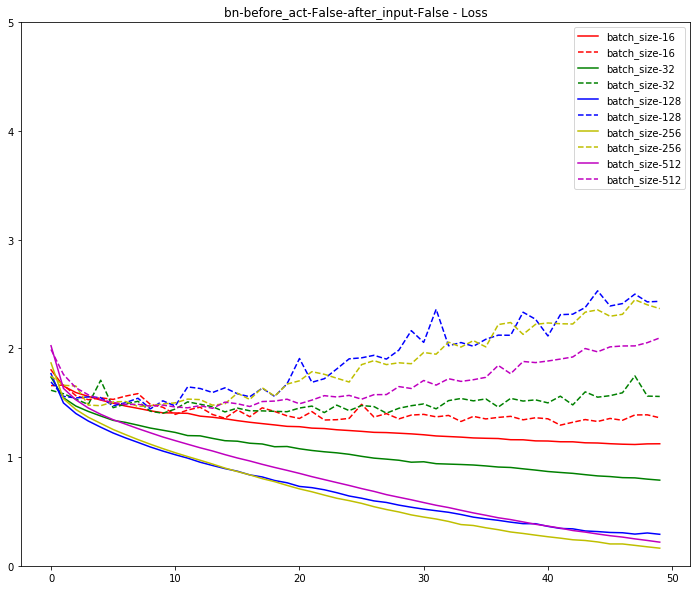

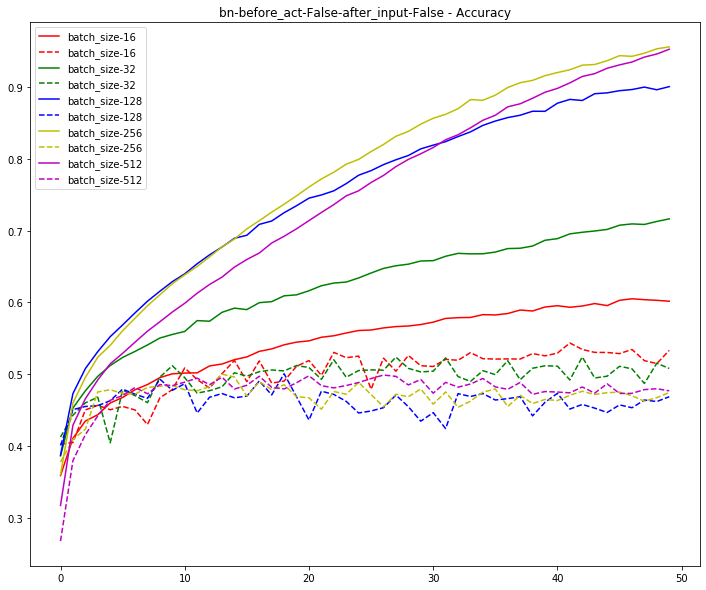

In [8]:

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bn_activation in BN_BEFORE_ACT:
    for bn_input in BN_AFTER_INPUT:
        
        results = {}
        for batch_size in BATCH_SIZE:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            print(f"\nBN_BEFORE_ACT = {bn_activation}")
            print(f"BN_AFTER_INPUT = {bn_input}")
            print(f"BATCH_SIZE = {batch_size}\n")
            
            # build model
            model = build_mlp(input_shape = x_train.shape[1:],
                              batches = batch_size,
                              bn_after_input = bn_input,
                              bn_before_act = bn_activation
                             )
            model.summary()
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
            
            model.fit(x_train, y_train,
                      epochs=EPOCHS,
                      batch_size=batch_size,
                      validation_data=(x_test, y_test),
                      shuffle=True)
            
            # Score trained model.
            scores = model.evaluate(x_test, y_test, verbose=1)
            print('Test loss:', scores[0])
            print('Test accuracy:', scores[1])
        
            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["accuracy"]
            valid_acc = model.history.history["val_accuracy"]
            
            batch_tag = f"batch_size-{str(batch_size)}"
            
            bn_tag = f"bn-before_act-{str(bn_activation)}-after_input-{str(bn_input)}"
            results[batch_tag] = {'train-loss': train_loss,
                                  'valid-loss': valid_loss,
                                  'train-acc': train_acc,
                                  'valid-acc': valid_acc}
            
        plot_result(name_tag = bn_tag, result_dict = results)

